# Neurona Lineal - Autos - Predicción
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
def entorno_de_trabajo():
    if 'google.colab' in str(get_ipython()): return "colab"  # Colab?
    else: return "local"  # Local => Linux, Windows, WSL

if entorno_de_trabajo() == 'colab': # maquina virtual colab
    from google.colab import drive
    drive.mount('/content/drive/')  # monta G-drive en entorno COLAB

    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'  # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else: # entorno local # Rutas relativas al script para entornos locales Windows, WSL y Linux
    FUENTES_DIR = '../../FUENTES/'  # Ajusta según tu estructura
    DATOS_DIR = '../../DATOS/'

import sys
sys.path.append(FUENTES_DIR) # agrega ruta de busqueda donde tenemos archivos .py

Mounted at /content/drive/


**Carga del Dataset y selección de atributos numéricos**

In [2]:
import os
import pandas as pd
import numpy as np
import chardet
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'automobile-simple.csv'

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())

df= pd.read_csv(nombre_archivo, encoding=result['encoding'])

print(result['encoding'])
df

ascii


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


**Asignar atributos sin valor o con valor nulo**

In [3]:
# muestra cantidad de valores faltantes o nulos por atributo/característica
print('Antes:\n',df.isnull().sum(), '\n')

values = {'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)

# comprobacion
print('Despues:\n', df.isnull().sum())

Antes:
 make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64 

Despues:
 make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64


**Normalización de valores de atributo y valor a predecir**

In [4]:
# Imprime matriz de correclacion
corr = df[['engine-size', 'price']].corr()
display(corr)

# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
T = np.array(df['price']).reshape((-1,1))

# normalizacion de datos de entrada
normalizarEntrada = 2

if normalizarEntrada==0:
    data_scaler = None
    targer_scaler = None
elif normalizarEntrada==1:
    data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
    X = data_scaler.fit_transform(X)
    T = targer_scaler.fit_transform(T)
elif normalizarEntrada==2:
    data_scaler, targer_scaler = StandardScaler(), StandardScaler()
    X = data_scaler.fit_transform(X)
    T = targer_scaler.fit_transform(T)

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


**Construccion del modelo y entrenamiento**

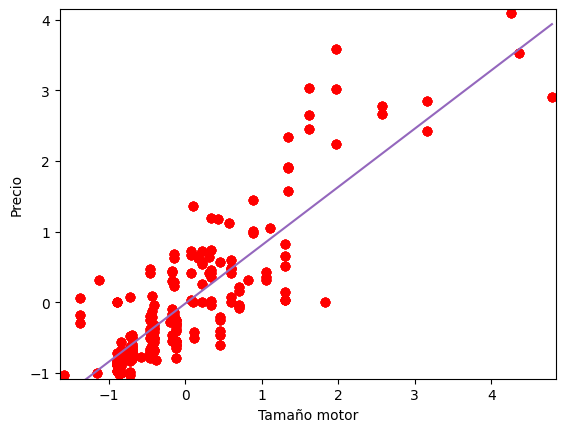

Errores:
  0 => 68.832376
  1 => 54.678072
  2 => 54.626608
  3 => 54.626029
  4 => 54.626022


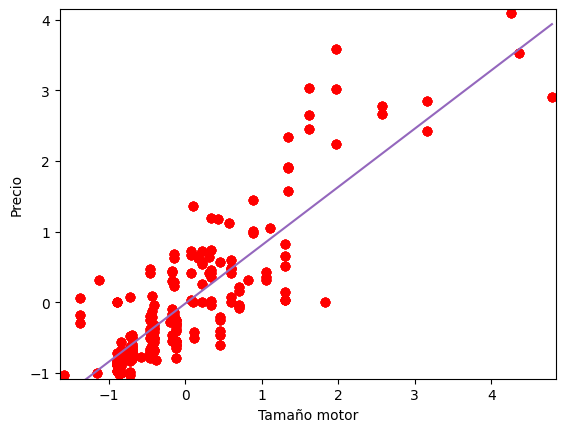

In [5]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.00001, draw=1, title=['Tamaño motor', 'Precio'])
modelo.fit(X, T)

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))

**Prediccion de valores**

In [6]:
# invierte normalización para predecir
tamaño_motor = 130

entrada = np.array([tamaño_motor]).reshape((-1,1))

if data_scaler:
  entrada = data_scaler.transform(entrada)

prediccion = modelo.predict( entrada )

if targer_scaler:
  prediccion = targer_scaler.inverse_transform([prediccion])

# para la siguiente prueba tamaño_motor debe coincidir con valores de engin-size en el data_frame

autos_sel = df['engine-size']==tamaño_motor
valor_prom = df[autos_sel]['price'].mean()
valor_min = df[autos_sel]['price'].min()
valor_max = df[autos_sel]['price'].max()

print('Tamaño Motor.....:%.0f ' % tamaño_motor)

print('Prediccion Precio: %.2f\n'% prediccion[0][0])

print('  Precio Promedio: %.2f'% valor_prom)
print('    Precio Mínimo: %.2f'% valor_min)
print('    Precio Máximo: %.2f'% valor_max)

display(df[autos_sel])

Tamaño Motor.....:130 
Prediccion Precio: 13545.99

  Precio Promedio: 16841.25
    Precio Mínimo: 13495.00
    Precio Máximo: 18950.00


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
198,volvo,gas,four,sedan,3045,130,162.0,17,22,18420.0,713029.632,27.780359
199,volvo,gas,four,wagon,3157,130,162.0,17,22,18950.0,729523.200,27.566173
